<a href="https://colab.research.google.com/github/6tfackr9/CS-450/blob/master/Prove04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignmnet Prove 04
##Tanner Fackrell

I chose the voting, credit screening and Iris datasets. The voting and credit screening will be used for classification while the Iris data set will be used for regression.

####Import libraries

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



##Voting Data

The First Data set I chose was the voting dataset. The goal here is to predict if a member of congress is a member of the republican or democratic party based on their voting records. It is entirely categorical data and has missing data. You can't really guess what the person is going to vote because each party will tend to vote a certain way. I decided to just keep them as unknown and for the algorithm to take this into account. Since this data is entirely categorical and there are 18 columns with only two different options in each column, I felt that one-hot encoding just did not make sense, it would leave too many columns in the data. I chose to use label encoding which would simply be a 1 or 0 speneding on if the person voted yes or no. After tryinng different depths for the tree, I found that a depth of 2 seemed to work the best. I was able to visualize the tree showing which voting issues provided the best entropy.

### Voting Data Code

In [0]:
voting_columns = ["Class Name", "handicapped-infants", 
                  "water-project-cost-sharing", "adoption-of-the-budget-resolution",
                  "physician-fee-freeze", "el-salvador-aid", "religious-groups-in-schools", 
                  "anti-satellite-test-ban", "aid-to-nicaraguan-contras", "mx-missile", "immigration",
                  "synfuels-corporation-cutback", "education-spending", "superfund-right-to-sue", 
                  "crime", "duty-free-exports", "export-administration-act-south-africa"]

voting = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", 
                     names = voting_columns)

num_missing = (voting.iloc[:,:] == '?').sum()
voting = voting.replace('?', "Unknown")

targets = voting[["Class Name"]]
features = voting.iloc[:, 1:18]
features = features.astype('category')
for (columnName, columnData) in features.iteritems():
    features[columnName] = features[columnName].cat.codes


In [0]:

f_names =  ["handicapped-infants", 
                  "water-project-cost-sharing", "adoption-of-the-budget-resolution",
                  "physician-fee-freeze", "el-salvador-aid", "religious-groups-in-schools", 
                  "anti-satellite-test-ban", "aid-to-nicaraguan-contras", "mx-missile", "immigration",
                  "synfuels-corporation-cutback", "education-spending", "superfund-right-to-sue", 
                  "crime", "duty-free-exports", "export-administration-act-south-africa"]

c_names = ["Democrat", "Republican"]


train_data, test_data, train_targets, test_targets = train_test_split(features, targets, test_size=.3)
my_tree = DecisionTreeClassifier(random_state = 0, max_depth = 2, criterion = 'entropy')
my_tree.fit(train_data, train_targets)
#predictions = my_tree.predict(test_data, test_targets)
my_scores = cross_val_score(my_tree, features, targets, cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (my_scores.mean(), my_scores.std() * 2))
#tree.plot_tree(fitted_tree)


###Prediction results for the voting Dataset

In [0]:
predictions = my_tree.predict(test_data)
score = accuracy_score(predictions, test_targets)
print("The prediction accuracy is {:.2f}%".format(score*100))

The prediction accuracy is 95.42%


[Text(310.0, 283.125, 'physician-fee-freeze <= 1.5\nentropy = 0.961\nsamples = 304\nvalue = [187, 117]\nclass = Democrat'),
 Text(155.0, 169.875, 'adoption-of-the-budget-resolution <= 1.5\nentropy = 0.152\nsamples = 182\nvalue = [178, 4]\nclass = Democrat'),
 Text(77.5, 56.625, 'entropy = 0.619\nsamples = 26\nvalue = [22, 4]\nclass = Democrat'),
 Text(232.5, 56.625, 'entropy = 0.0\nsamples = 156\nvalue = [156, 0]\nclass = Democrat'),
 Text(465.0, 169.875, 'synfuels-corporation-cutback <= 1.5\nentropy = 0.38\nsamples = 122\nvalue = [9, 113]\nclass = Republican'),
 Text(387.5, 56.625, 'entropy = 0.08\nsamples = 101\nvalue = [1, 100]\nclass = Republican'),
 Text(542.5, 56.625, 'entropy = 0.959\nsamples = 21\nvalue = [8, 13]\nclass = Republican')]

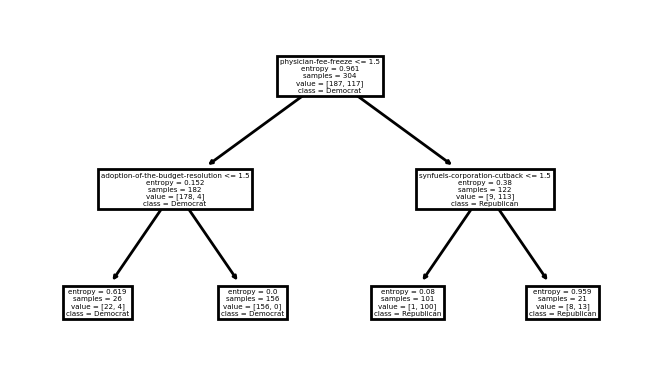

In [33]:
# I learned how to size the tree from 
#https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,2.25), dpi=200)
tree.plot_tree(my_tree, feature_names = f_names, class_names = c_names)

To do list experiment on this one with the numerical columns to see if I can put in some averages.


## Credit Screening Data

The goal for this data is to predict if it is a good idea to give out a bank loan based on the credit history of a client. There was not very much data missing in this dataset so I chose to simply get rid of the rows that contatined missing data. This left a lot of data still in the dataset. This data was a mix of categorical and numeric data. I felt that it was appropriate to use one-hot encoding for the categorical data. I also found that using a tree depth of 3 seemed to provide the best results after trying a few different depths.

### Credit Screening Code

In [0]:
credit_columns = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9",
                  "A10", "A11", "A12", "A13", "A14", "A15", "A16"]

credit = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data", 
                     names = credit_columns)

credit_num_missing = (credit.iloc[:,:] == '?').sum()
credit_num_missing
credit = credit.replace('?', np.nan)
credit2 = credit.dropna()
# There is really not that much data missing, so it is safe to remove the NAs
# We will try a one hot encoding here
credit3 = pd.get_dummies(credit2, columns=["A1", "A3", "A4", "A5", "A6", "A7", "A9",
                                           "A10", "A12", "A13"])
credit_targets = credit3[["A16"]]
credit_features = credit3.iloc[:, credit3.columns != "A16"]

train_data, test_data, train_targets, test_targets = train_test_split(credit_features, credit_targets, test_size=.3)
my_tree = DecisionTreeClassifier(random_state = 0, max_depth = 3)
my_tree.fit(train_data, train_targets)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


### Prediction Results for Credit Screening Dataset

In [0]:
predictions = my_tree.predict(test_data)
accuracy_score(predictions, test_targets)
print("The accuracy for credit screeings is {:.2f}%".format(accuracy_score * 100))

##Iris Data

In the past we used this dataset to classify the type of iris, but for this exercise I decided to use regression to predict the sepal length. Of the three datasets chosen this one was the most straight forward. The data was mostly numeric, with one column of categorical. I used label encoding to handle the categories.

###Iris Code

In [0]:
iris_columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]

iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                   names = iris_columns)

iris_tree = DecisionTreeRegressor(max_depth = 2)
iris["class"] = iris["class"].astype('category')
    iris["class"] = iris["class"].cat.codes

iris_targets = iris[["sepal length"]]
iris_features = iris.iloc[:, iris.columns != "sepal length"]

train_data, test_data, train_targets, test_targets = train_test_split(iris_features, iris_targets, test_size=.3)
iris_tree.fit(train_data, train_targets)
predictions = iris_tree.predict(test_data)


###Iris Prediction Results

In [0]:
mean_error = mean_squared_error(predictions, test_targets)
print("The Mean Square Error is: {}".format(mean_error))

I believe that my work on this assignment is best represented by a 5. I used three different datasets which between them had missing data, categorical data and numeric data. I also found opportunities to use classification and regression. I went above and beyond by providing a visualization of the voting dataset. I also experiemented with implementing the algorithm in different ways including changing the haight of the tree. 

Here is the link to my full code: